# __DATA 5600: Introduction to Regression and Machine Learning for Analytics__

## __Notes on the Bayesian Beta-Bernoulli Conjugate Model__ <br>

Author:      Tyler J. Brough <br>
Last Update: September 13, 2021 <br>

<br>

In [1]:
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = [10, 5]

<br>

## Introduction

<br>

I would like to take a step back and consider the process of Bayesian inference in a simpler model. We will first consider the simple case of flipping a coin and estimating the proportion of heads. Let $Y \in \{0,1\}$ be our random variable for the outcome of a coin flip where $y = 1$ stands for heads and $y = 0$ stands for tails. 

<br>

We will first consider the case where we have a fair coin. That is, where $\theta = 0.5$, and $\theta$ is the proportion of heads in the total number of flips. By definition, each flip is independent of the last. We usually model coin flipping with the _Binomial distribution_. So we will first take some time to understand the basic details of that particular distribution. 

<br>

Note that we are no so interested in the coin flipping problem per se, but rather are interested in it because it offers a simple setting in which to come to grips with the process of Bayesian statistical inference. Although, the binomial distribution does play an important role in finance, and coin flipping can be replaced in a more general setting for any binary outcome. Therefore, the process of statistical inference that we derive for coin flipping can apply much more broadly to more interesting questions. Here are some examples of binary random variables that we might be interested in:

<br>

- The existence of God

- In a two-party election, what is the probability that a person will vote for each candidate?

- If you are an airline analyst, what is the probability that a passenger will show up for his flight? Should you overbook? By how much?

- For a given job training program, what is the probability that we will see at least a $10\%$ improvement?

- For a given survey question, what is the probability that a respondent will agree or disagree?

- In online advertising what is the probability of a click-through?

<br>

<br>

## The Bernoulli and Binomial Distributions

<br>

Please see the following Wikipedia artciles on the _Bernoulli_ and _Binomial_ distributions:

- The Bernoulli distribution: <https://en.wikipedia.org/wiki/Bernoulli_distribution>

- The Binomial distribution: <https://en.wikipedia.org/wiki/Binomial_distribution>

<br>

<br>

### The Bernoulli Distribution

<br>

Consider flipping a coin a single time and recording the outcome. Let the random variable $Y$ represent the outcome of the single flip. Also let $\theta$ be the probability of the coin landing on heads (if it is a fair coin, then $\theta = 0.5$). Then we can say the following:

- $p(y = 1 | \theta) = \theta$

- $p(y = 0 | \theta) = 1 - \theta$

We can combine these equations as follows:

$$
p(y | \theta) = \theta^{y} (1 - \theta)^{(1 - y)}
$$

This is the _Bernoulli distribution_ for $Y \in \{0,1\}$ and $0 \le \theta \le 1$. 

We can show that:

- $E(Y) = \theta$

- $Var(Y) = \theta (1 - \theta)$

Note that when $y = 1$ the expression simplifies to $\theta$, and when $y = 1$ the expression becomes $(1 - \theta)$

<br>

<br>

### The Binomial Distribution

<br>

Now consider the case when we flip a coin some number of times, denote this by $N$. We might then ask how many times a heads came up in the total number of flips. In this case, $\theta$ is still the probability of heads for a single flip, but we can also interpret it as the proportion of heads in $N$ flips. Each flip is called a Bernoulli trial. So the Binomial distribution is a generalization of the Bernoulli distribution. In fact, when $N = 1$, the Binomial distribution collapses to the Bernoulli distribution. 

<br>

Let $X \in \{1,\ldots,N\}$ represent the number of heads in $N$ trials. In other words, let $X = \sum\limits_{i=1}^{N} Y_{i}$, where each $Y_{i}$ is the outcome of a single trial. Then $X$ has a _Binomial_ distribution (or $X$ is distributed according to the Binomial distribution):

<br>

$$
p(X | N) = \binom{N}{X} \theta^{X} (1 - \theta)^{(N - X)}
$$

<br>

where 

<br>

$$
\binom{N}{X} = \frac{N!}{(N-X)!X!}
$$

<br>

is the number of ways to choose $X$ items from $N$.

<br>

Say we have the data set $D = \{y_{1}, \ldots, y_{N}\}$ where each $y_{i}$ is the observed outcome of a single flip (i.e. a single Bernoulli trial). Notice that the likelihood function becomes:

<br>

$$
p(D | \theta) = \prod\limits_{i=1}^{N} p(y_{i} | \theta) = \prod\limits_{i=1}^{N} \theta^{y_{i}} (1 - \theta)^{(1 - y_{i})} = \theta^{N_{1}} (1 - \theta)^{N_{0}}
$$

<br>

where $N_{1} = \sum_{i} y_{i}$ is the number of heads and $N_{0} = \sum_{i} (1 - y_{i})$ is the number of tails. Obviously, $N = N_{1} + N_{0}$. 

<br>

This the Binomial likelihood function for our data. 

<br>
<br>

<br>

## Parameter Estimation

<br>

Say we have a coin with probability of heads $\theta$. How do we estimate $\theta$ from a sequence of coin tosses $D = \{Y_{1}, \ldots, Y_{N}\}$, where $Y_{i} \in \{0,1\}$?

<br>

<br>

### Maximum Likelihood

<br>

One approach is to find a maximum likelihood estimate (__NB:__ a frequentist approach):

<br>

$$
\hat{\theta}_{ML} = \arg\max_{\theta} p(D | \theta)
$$

<br>


Given $D = \{y_{1}, \ldots, y_{N}\}$, the likelihood is 

<br>

$$
p(D | \theta) = \theta^{N_{1}} (1 - \theta)^{N_{0}}
$$

<br>

as shown above. To find the maximum likelihood it is sometimes easier to work with the log-likelihood function. 

<br>

The log-likelihood function is

<br>

$$
L(\theta) = \log{p(D | \theta)} = N_{1} \log{\theta} + N_{0} \log{1 - \theta}
$$

<br>

Solving for $\frac{dL}{d\theta} = 0$ yields

<br>

$$
\hat{\theta}_{ML} = \frac{N_{1}}{N_{1} + N_{0}} = \frac{N_{1}}{N}
$$

<br>

It can be shown (although we won't here) that this estimator has all the good properties that we desire from a frequentist estimator such as unbiasedness, consistency, and efficiency. It also has the nice feature of simplicity. 

<br>

Suppose we flip the coin $N = 100$ times and we observe $N_{1} = 48$ heads. Then, the maximum likelihood estimator gives us:

<br>

$$
\hat{\theta}_{ML} = \frac{N_{1}}{N} = \frac{48}{100} = 0.48 
$$

<br>

We might simulate this in `Python` as follows:

<br>
<br>

In [2]:
theta = 0.5
N = 1000
flips = np.random.binomial(n=1, p=theta, size=N);
flips

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,

In [3]:
N1 = np.sum(flips)
theta_hat_ml = N1 / N
print(f"\nThe Maximum Likelihood Estimator is: \t{theta_hat_ml : 0.6f}\n")
print(f"The Mean Squared Error is: \t\t{np.sqrt((theta - theta_hat_ml)**2.0) : 0.6f}\n\n")


The Maximum Likelihood Estimator is: 	 0.494000

The Mean Squared Error is: 		 0.006000




<br>

But what happens if we flip the coin $N = 3$ times and we observe $N_{1} = 0$ heads? Then we predict that heads are impossible!

<br>

$$
\hat{\theta}_{ML} = \frac{N_{1}}{N} = \frac{0}{3} = 0 
$$

<br>

This is known as a ___sparse data problem___: if we fail to see something in our data sample, then we predict that it will never happen in the future. We will see how the Bayesian approach avoids this problem. 

<br>

<br>

### Bayesian Estimation

<br>

The Bayesian approach is to treat $\theta$ as an uncertain variable and to use the rules of probability to characterize that uncertainty. In addition, we can use Bayes' Rule to update our belief about $\theta$ having confronted the evidence $D = \{y_{1}, \ldots, y_{N}\}$:

<br>

$$
p(\theta | D) = \frac{p(D | \theta) p(\theta)}{\int_{\theta^{\prime}} p(\theta^{\prime}, D)}
$$

<br>

Notice that the answer to the Bayesian inference problem is an entire probability distribution that now characterizes our uncertainty regarding $\theta$ having confronted the evidence. If we wish to have a point estimate, we can report the mean or mode of the posterior distribution. We can also look at the standard deviation of the posterior distribution to give a sense of our uncertainty. 

<br>

Below we will detail the process of Bayesian inference for coin flipping in some detail. We will also compare it with the maximum likelihood estimator.

<br>
<br>

<br>

## __Bayesian Inference for Coin Flipping__

<br>

<br>

### The Likelihood Function

<br>

As before, we have the Binomial likelihood function:

<br>

$$
p(D | \theta) = \theta^{N_{1}} (1 - \theta)^{N_{0}}
$$

<br>

Now that we have a good likelihood function, we turn our attention to a prior distribution that might characterize our beliefs about $\theta$ before we observe the data. We might like to use a _Natural Conjugate Prior_ distribution. For a Binomial likelihood function, one such prior distribution is the _Beta_ distribution. 

<br>

Let's look at the Beta distribution next.

<br>
<br>

<br>

### The Beta Distribution

<br>

First of all, take a look at the Wikipedia article on the Beta distribution: <https://en.wikipedia.org/wiki/Beta_distribution>

<br>

The Beta distribution is expressed as follows:

<br>

$$
p(\theta) = Be(\theta | a, b) = \frac{1}{B(a,b)} \theta^{(a - 1)} (1 - \theta)^{(b - 1)}
$$

<br>

for $\theta$ in the interval $[0, 1]$ and where $B(a,b)$ is known as the _Beta Function_. See the Wikipedia article here: <https://en.wikipedia.org/wiki/Beta_function>. This is a special function with the following property:

<br>

$$
B(a,b) = \int\limits_{0}^{1} \theta^{(a - 1)} (1 - \theta)^{(b - 1)} d\theta.
$$

<br>

In `Python` the Beta function is `scipy.special.beta(a, b, out=None)`, and the Beta distribution is `scipy.stats.beta = <scipy.stats._continuous_distns.beta_gen object>`.

* ___Note:___ see here for documentation on the beta function: https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.beta.html

* ___Note:___ see here for documentation on the beta distribution: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html

<br>

___Note:___ the random variable in the Beta distribution is $\theta$, and that $a$ and $b$ are its parameters. 

<br>

It turns out that we can express the Beta function in terms of another special function, the _Gamma Function_ (see here: <https://en.wikipedia.org/wiki/Gamma_function>).

<br>

The Gamma function can also be expressed as an integral:

<br>

$$
\Gamma(a) = \int\limits_{0}^{\infty} t^{(a - 1)} exp(-t) dt
$$

<br>

It can be shown that 

- $\Gamma(a) = (a - 1)!$

- $B(a,b) = \frac{\Gamma(a) \Gamma(b)}{\Gamma(a + b)}$

<br>

It can also be shown that:

- $E(\theta) = \frac{a}{a + b}$

<br>

The Beta distribution can generate many different shapes. Let's look at some below using some `Python` code.

<br>

Let's start off with the case when $a = b = 1$

<br>
<br>

In [4]:
## Helper function to plot Beta priors
def plot_beta_prior(a=1, b=1):
    x = np.linspace(0, 1, 1000)
    y = stats.beta.pdf(x, a, b)
    plt.plot(x, y, lw = 2.0, color='darkblue', alpha=0.8)
    plt.fill_between(x, y, facecolor='orange', alpha=0.5)
    plt.title(f"Beta({a},{b}) Prior Distribution")
    plt.show()

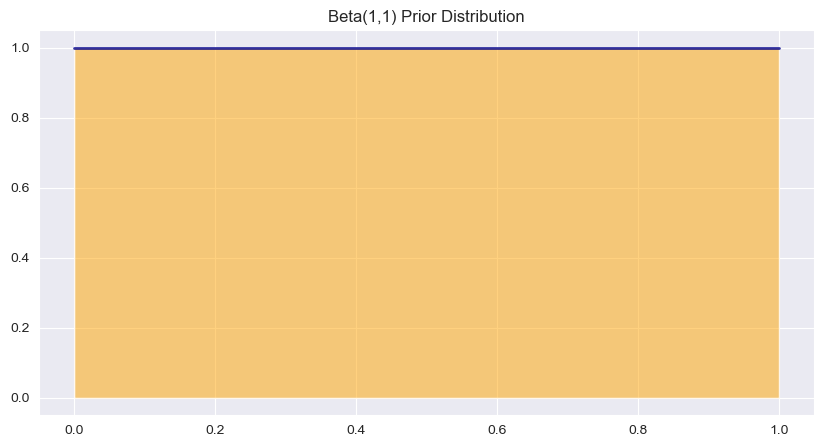

In [5]:
## Plot a Uniform(0, 1) which is a special case of the Beta
## Uniform(0, 1) = Beta(a=1, b=1)

plot_beta_prior()

<br>

This turns out to be a special case of the Beta distribution known as the ___uniform distribution___ (see here: <https://en.wikipedia.org/wiki/Uniform_distribution_(continuous)>). It's called the Uniform distribution because it treats each value in the interval $[0,1]$ uniformly. That is, each value in $[0,1]$ is equally likely. Sometimes this form of the Beta prior is used to characterize complete ignorance (e.g. "I don't know, so I'll treat every value as equally likely.").

<br>
<br>

Next let's look at the case when $a = b = 2$.

<br>

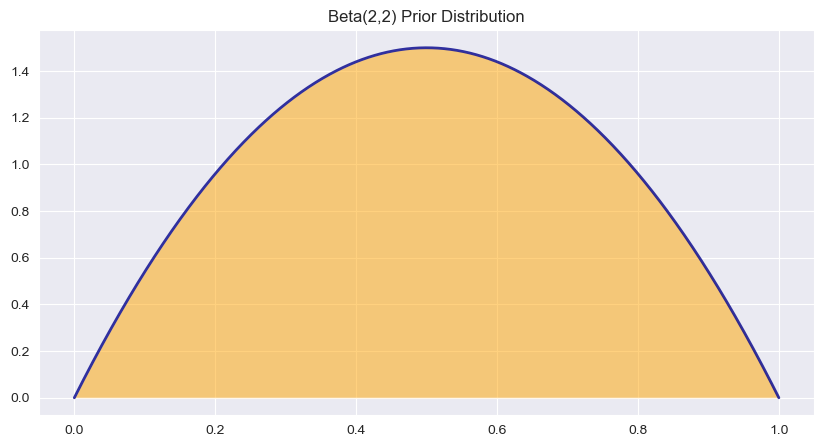

In [6]:
plot_beta_prior(a=2, b=2)

<br>

Here the distribution is centered around the value $\theta = 0.5$, but it is quite diffuse - expressing quite a bit of uncertainty. 

<br>
<br>

Let's look at a case when we are just a bit more certain: $a = b = 4$.

<br>

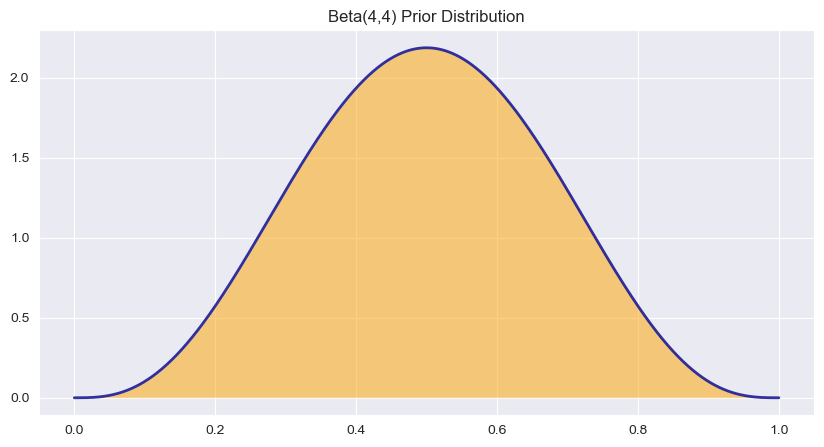

In [7]:
plot_beta_prior(a=4, b=4)

<br>

And even a little bit more certain: $a = b = 8$

<br>

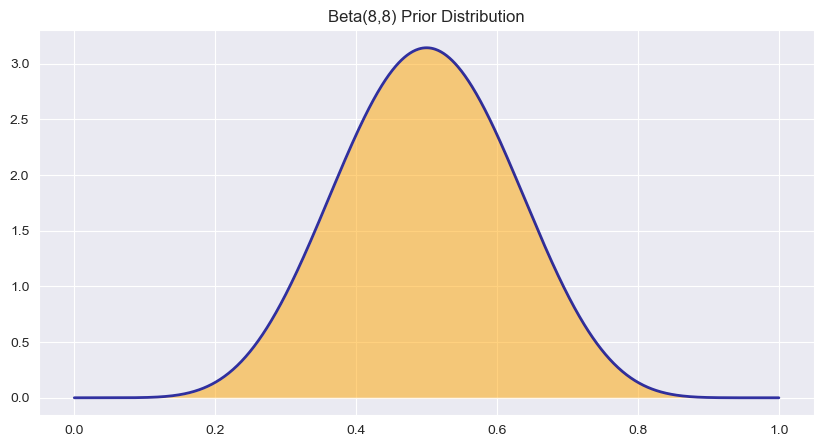

In [8]:
plot_beta_prior(a=8, b=8)

<br>

We can continue this process: $a = b = 16$

<br>

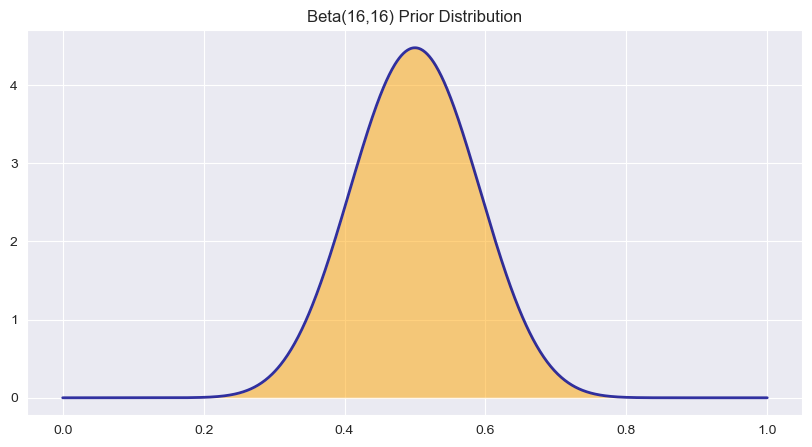

In [9]:
plot_beta_prior(a=16, b=16)

<br>

___Note:___ play with these plots and generate your own!

We can also have a situation that is not symetric about center: $a = 2$ and $b = 4$

<br>

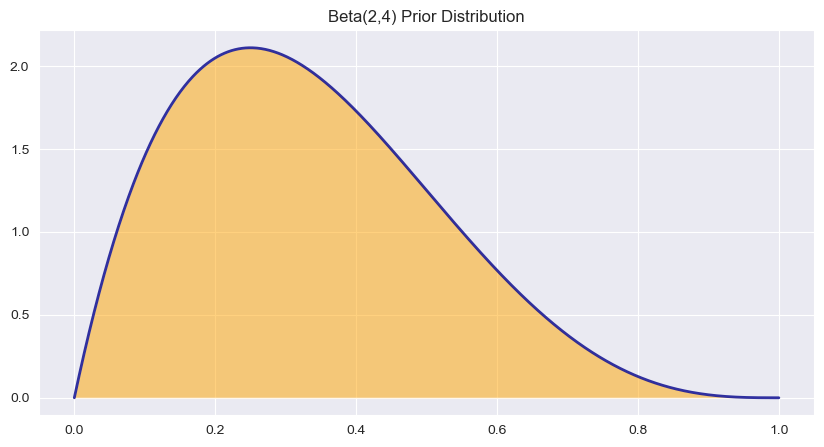

In [10]:
plot_beta_prior(a=2, b=4)

<br>

And the other way too!

<br>

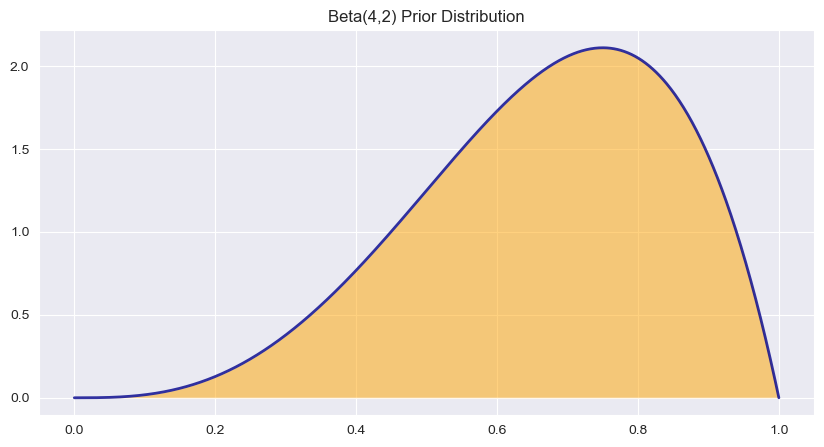

In [11]:
plot_beta_prior(a=4, b=2)

<br>

We can even get some funkier shapes like this: $a = b = 0.5$

<br>

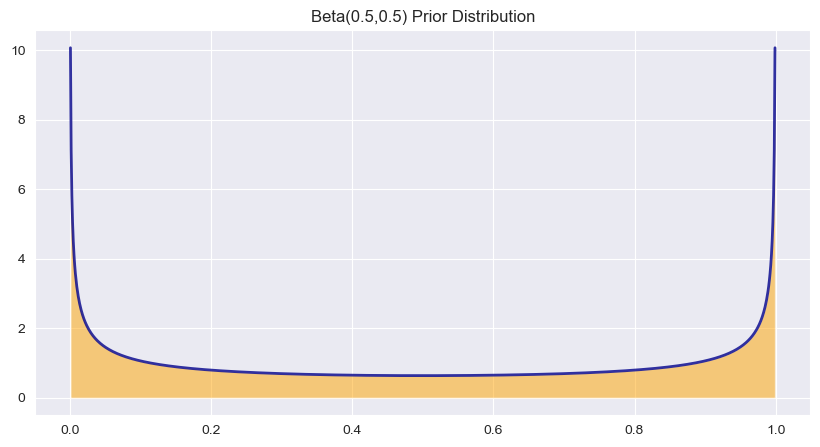

In [37]:
plot_beta_prior(a=0.5, b=0.5)

<br>

We can see that the Beta distribution is quite flexible and can express quite a number of different prior beliefs about $\theta$ depending on the chosen hyperparameters $a$ and $b$.

One way of eliciting a prior belief about $theta$ is think about having witnessed some _virtual_ flips of the coin. For example, we might expect that it is a fair coin, so that the distribution ought to be centered around $0.5$. We might parameterize this with the variable $m$, thinking of $m$ as the mean proportion of heads in our virtual experiment:

$$
m = \frac{a}{(a + b)}
$$

Further, we might think of the variable $n = a + b$ as our virtual number of flips, and $a$ as the virtual number of heads and $b$ as the virtual number of tails. As $n$ gets larger we are expressing greater and greater confidence. However, if $n$ is small, say $n = 4$, then we might not be so confident (i.e. we are imagining only having witnessed 4 flips - it wouldn't take too much data to convince us that we are wrong). 

Solving these two equations gives us:

$$
\begin{aligned}
a &= m \times n \\
b &= (1 - m) \times n
\end{aligned}
$$

<br>

<br>

### The Posterior Distribution

<br>

Now we have the likelihood function and a natural conjugate prior. Let's use Bayes' Rule to derive the posterior distribution. 

<br>

$$
\begin{aligned}
p(\theta | D) & \propto p(D | \theta) \times p(\theta) \\
              & \propto [\theta^{N_{1}} (1 - \theta)^{N_{0}}][\theta^{(a - b)}(1 - \theta)^{(b - 1)}] \\
              & = \theta^{N_{1} + a - 1} (1 - \theta)^{N_{0} + b - 1}
\end{aligned}
$$

<br>

___Note:___ this is a $Beta(\theta  |  N_{1} + a, N_{0} + b)$ distribution, which demonstrates that it is conjugate (i.e. of the same form as the prior).

<br>

<br>

## Applying the Model to Coin Flipping

<br>

We can now use this model to revise our beliefs as the data arrive (i.e. after each coin flip). This is called sequential analysis, and note that the Bayesian paradigm lends itself quite naturally to this kind of _on-line_ analysis due to the process of Bayesian updating. Whereas, in the frequentist case we have to precommit ourselves to conducting a study to flip the coin $N$ times, and then count the number of heads. 

<br>

Let's look at an example. Suppose you start with the belief that $a = b = 2$. Then you observe the first flip $y = 1$ (a heads) to get $Beta(\theta | 3, 2)$, so the mean shifts from $E(\theta) = 2/4$ to $E(\theta | D) = 3/5$. We see that the hyperparameters $a$ and $b$ do in fact act like "pseudo counts" and correspond to "virutal" heads or tails. We might call $n = a + b$ the effective sample size (it plays a role analogous to $N = N_{1} + N_{0}$). 

<br>

Let's simulate the process and see how our beliefs are updated with each flip.


<br>

In [38]:
a = 2 # virtual heads
b = 2 # virtual tails

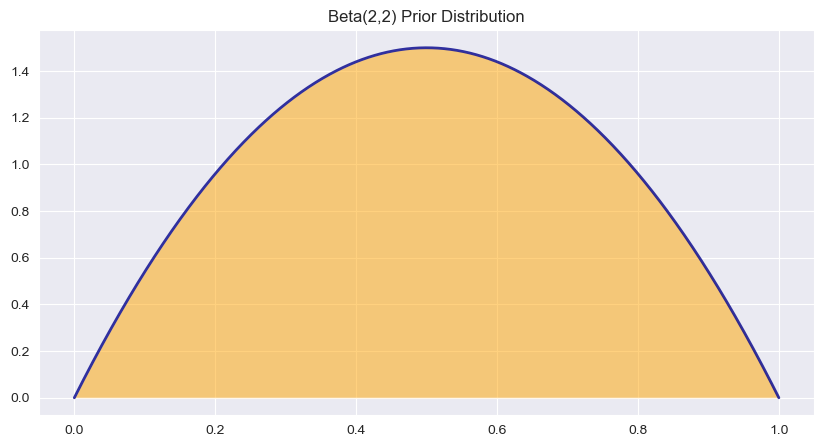

In [39]:
plot_beta_prior(a=a,b=b)

In [40]:
## Set the "true" probability
theta = 0.5 ## i.e. a fair coin

## Simulate a single flip of the coin
flip = np.random.binomial(n=1,p=theta,size=1)


## Set up counting variables
N1 = 0
N0 = 0

In [41]:
## Update the prior to get the posterior using Bayes' Rule
N1 += flip[0]
N0 += 1 - flip[0]
a_post = N1 + a
b_post = N0 + b

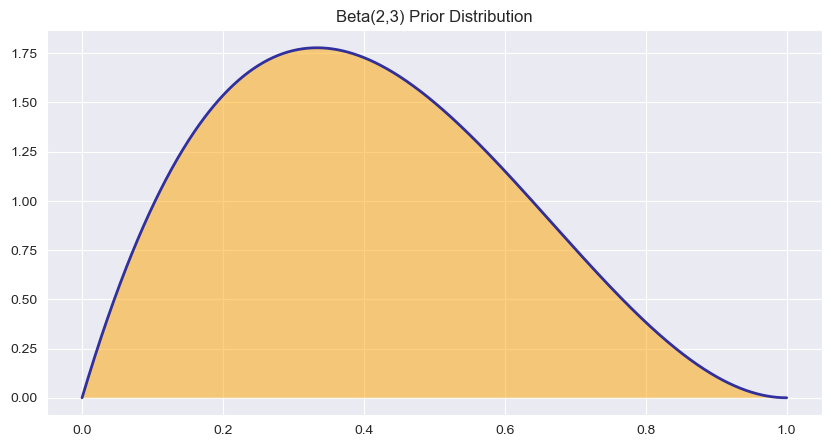

In [42]:
plot_beta_prior(a=a_post,b=b_post)

In [43]:
## Use the recent posterior as the new prior and repeat the process
a = a_post
b = b_post
flip = np.random.binomial(n=1,p=theta,size=1)

In [44]:
## Update the prior to get the posterior using Bayes' Rule
N1 += flip[0]
N0 += 1 - flip[0]
a_post = N1 + a
b_post = N0 + b

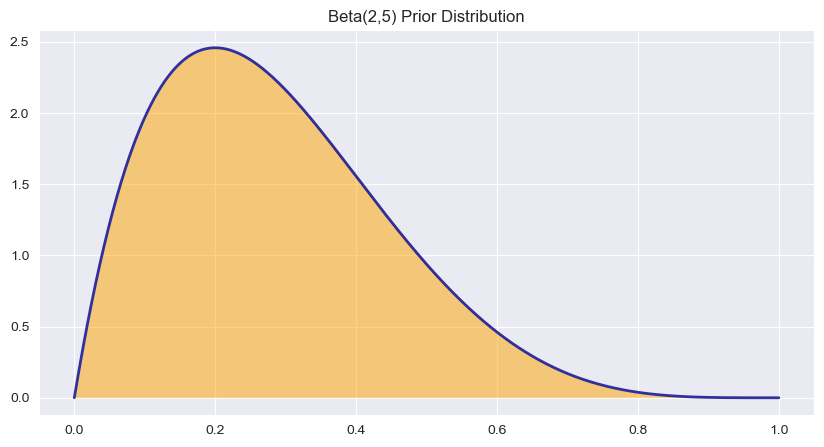

In [45]:
plot_beta_prior(a=a_post,b=b_post)

<br>

And so on, and so on. 

<br>

Here is a question to think about: _if we are flipping a biased coin (say $\theta = 0.45$), which analyst will discover it first? The Bayesian, or the Frequentist?_

We will discuss this example again later and show the comparison.


Here is another question to think about: _if two Bayesians start with different prior beliefs (say the first with $B(\theta | 1, 1)$ and the second with $B(\theta | 8, 8)$) how long will it take them to converge in their beliefs?_ _Will they for sure converge?_

Again, we can talk about this some more later. 

One final note. The Bayesian does not have to proceed sequentially. He can process a batch of data all at once. Let's see this case, again starting with the prior $B(\theta | 2, 2)$.

<br>

In [46]:
## Set the prior
a, b = 2, 2

In [47]:
## Set true theta
theta = 0.5

In [48]:
## The number of coin flips
M = 10000  

## Simulate flipping the coin M times
flips = np.random.binomial(n=1, p=theta, size=M)

In [49]:
## The update step
N1 = np.sum(flips)
N0 = M - N1
a_post = N1 + a
b_post = N0 + b

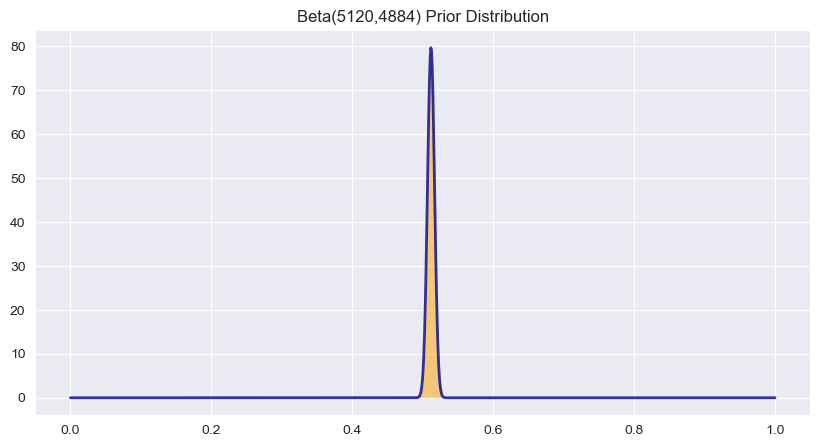

In [50]:
plot_beta_prior(a=a_post, b=b_post)

In [51]:
posterior_mean = a_post / (a_post + b_post)
print(f"\nThe posterior mean is: {posterior_mean : 0.4f}\n")


The posterior mean is:  0.5118



In [52]:
np.isclose(posterior_mean, theta)

False

In [53]:
print(f"\nThe MSE: {np.sqrt((theta - posterior_mean)**2.0) : 0.6f}\n")


The MSE:  0.011795



<br>

__Note:__ with $N = 10000$ flips we become pretty certain after seeing the data. 

Also, if we are dealing with a biased coin we will also learn that. Say the true probability of heads is $\theta = 0.65$ and that we flip the coin $N = 100$ times. 

<br>

In [62]:
## Set the prior
a, b = 2, 10

In [63]:
## Set true theta
theta = 0.8

In [67]:
## The number of coin flips
M = 1000

## Simulate flipping the coin M times
flips = np.random.binomial(n=1, p=theta, size=M)

In [68]:
## The update step
N1 = np.sum(flips)
N0 = M - N1
a_post = N1 + a
b_post = N0 + b

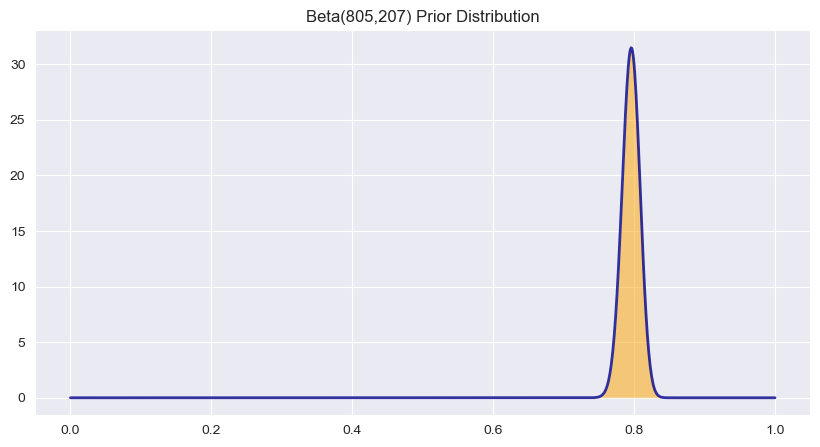

In [69]:
plot_beta_prior(a=a_post, b=b_post)

In [59]:
posterior_mean = a_post / (a_post + b_post)
print(f"\nThe posterior mean is: {posterior_mean : 0.4f}\n")


The posterior mean is:  0.7143



In [60]:
np.isclose(posterior_mean, theta)

False

In [61]:
print(f"\nThe MSE: {np.sqrt((theta - posterior_mean)**2.0) : 0.6f}\n")


The MSE:  0.064286

